In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
from sklearn.model_selection import KFold  # 交叉验证
from sklearn.metrics import mean_squared_error  # 计算均方误差函数

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 利用一至五阶多项式函数拟合正弦曲线，利用均方误差作为评价指标，选择出最合适的阶数

In [189]:
x = np.arange(0, 1.01, 0.01)
f = lambda z: np.sin(2*np.pi*z)

y_truth = f(x)

np.random.seed(247)
y_ob = f(x) + np.random.normal(0, 0.1, len(x))

# 打乱数组顺序
shuffle_index = np.arange(len(x))
random.shuffle(shuffle_index)

shuffle_x = x[shuffle_index]
shuffle_y_truth = y_truth[shuffle_index]
shuffle_y_ob = y_ob[shuffle_index]

KF = KFold(n_splits=5)  # 用于交叉验证

一次多项式

In [195]:
mse_1 = []

X_1 = sm.add_constant(shuffle_x)

for train_index, test_index in KF.split(shuffle_x):
    model = sm.OLS(shuffle_y_ob[train_index],X_1[train_index, :])
    result = model.fit()
    predict = X_1[test_index, :].dot(result.params.T)
    mse_ = mean_squared_error(shuffle_y_truth[test_index], predict)
    mse_1.append(mse_)

print(mse_1)
print("在一次幂下，经过5折交叉验证，平均均方误差为:%0.4f"%(sum(mse_1)/len(mse_1)))

[0.23511618596824185, 0.16003139053789375, 0.20536456972859565, 0.1915496920321571, 0.238961526698079]
在一次幂下，经过5折交叉验证，平均均方误差为:0.2062


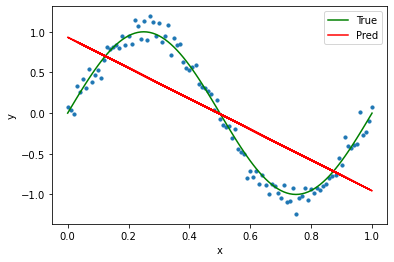

In [196]:
model = sm.OLS(shuffle_y_ob,X_1)
result = model.fit()
predict = X_1.dot(result.params.T)
fig = plt.figure(1)
plt.plot(x, y_truth, 'g-',label="True")  # 绘制正弦图像
plt.scatter(x,y_ob,s=10)  # 绘制观测样本点
plt.plot(shuffle_x, predict, 'r-',label="Pred")#预测曲线
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

二次多项式

In [197]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=2)
X_2 = polynomial_features.fit_transform(shuffle_x.reshape(-1,1))#2阶多项式
print("The dimension of the design matrix:",X_2.shape)  

The dimension of the design matrix: (101, 3)


(101, 3)


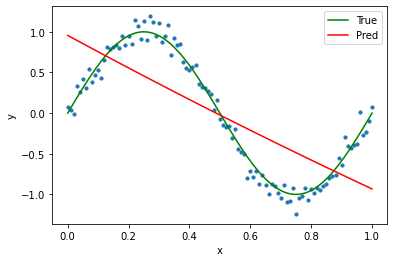

In [198]:

polynomial_features= PolynomialFeatures(degree=2)
xp = polynomial_features.fit_transform(x.reshape(-1,1))
print(xp.shape)
model = sm.OLS(y_ob, xp).fit()
ypred = model.predict(xp) 


fig = plt.figure(2)
plt.plot(x, y_truth, 'g-',label="True")  # 绘制正弦图像
plt.scatter(x,y_ob,s=10)  # 绘制观测样本点
plt.plot(x, ypred, 'r-',label="Pred")#预测曲线
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [199]:
mse_2 = []



for train_index, test_index in KF.split(shuffle_x):
    model = sm.OLS(shuffle_y_ob[train_index],X_2[train_index, :])
    result = model.fit()
    predict = X_2[test_index, :].dot(result.params.T)
    mse_ = mean_squared_error(shuffle_y_truth[test_index], predict)
    mse_2.append(mse_)

print(mse_2)
print("在2次幂下，经过5折交叉验证，平均均方误差为:%0.4f"%(sum(mse_2)/len(mse_2)))

[0.27858324393466966, 0.17381002366684942, 0.260352062723063, 0.19097474372471632, 0.23937288476625498]
在2次幂下，经过5折交叉验证，平均均方误差为:0.2286


三次多项式

(101, 4)


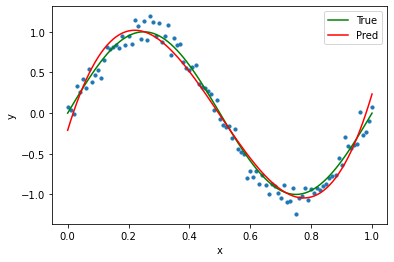

In [200]:

polynomial_features= PolynomialFeatures(degree=3)
xp = polynomial_features.fit_transform(x.reshape(-1,1))
print(xp.shape)
model = sm.OLS(y_ob, xp).fit()
ypred = model.predict(xp) 


fig = plt.figure(2)
plt.plot(x, y_truth, 'g-',label="True")  # 绘制正弦图像
plt.scatter(x,y_ob,s=10)  # 绘制观测样本点
plt.plot(x, ypred, 'r-',label="Pred")#预测曲线
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [201]:

polynomial_features= PolynomialFeatures(degree=3)
X_3 = polynomial_features.fit_transform(shuffle_x.reshape(-1,1))#3阶多项式
print("The dimension of the design matrix:",X_3.shape)  

The dimension of the design matrix: (101, 4)


In [202]:
mse_3 = []



for train_index, test_index in KF.split(shuffle_x):
    model = sm.OLS(shuffle_y_ob[train_index],X_3[train_index, :])
    result = model.fit()
    predict = X_3[test_index, :].dot(result.params.T)
    mse_ = mean_squared_error(shuffle_y_truth[test_index], predict)
    mse_3.append(mse_)

print(mse_3)
print("在3次幂下，经过5折交叉验证，平均均方误差为:%0.4f"%(sum(mse_3)/len(mse_3)))

[0.010267565801531155, 0.00378331413577467, 0.005208083242114592, 0.006019440761704112, 0.005941510134641269]
在3次幂下，经过5折交叉验证，平均均方误差为:0.0062


四次多项式

(101, 5)


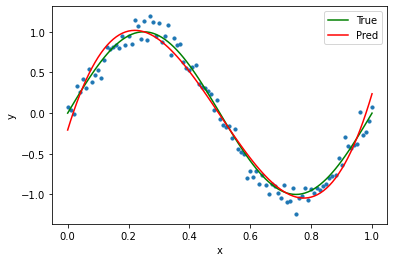

In [203]:
polynomial_features= PolynomialFeatures(degree=4)
xp = polynomial_features.fit_transform(x.reshape(-1,1))
print(xp.shape)
model = sm.OLS(y_ob, xp).fit()
ypred = model.predict(xp) 


fig = plt.figure(2)
plt.plot(x, y_truth, 'g-',label="True")  # 绘制正弦图像
plt.scatter(x,y_ob,s=10)  # 绘制观测样本点
plt.plot(x, ypred, 'r-',label="Pred")#预测曲线
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [204]:

polynomial_features= PolynomialFeatures(degree=4)
X_4 = polynomial_features.fit_transform(shuffle_x.reshape(-1,1))#4阶多项式
print("The dimension of the design matrix:",X_4.shape)  
mse_4 = []



for train_index, test_index in KF.split(shuffle_x):
    model = sm.OLS(shuffle_y_ob[train_index],X_4[train_index, :])
    result = model.fit()
    predict = X_4[test_index, :].dot(result.params.T)
    mse_ = mean_squared_error(shuffle_y_truth[test_index], predict)
    mse_4.append(mse_)

print(mse_4)
print("在4次幂下，经过5折交叉验证，平均均方误差为:%0.4f"%(sum(mse_4)/len(mse_4)))

The dimension of the design matrix: (101, 5)
[0.015156274170891002, 0.0040008722460215355, 0.0058511104584505706, 0.0061234893574683424, 0.007019275249573661]
在4次幂下，经过5折交叉验证，平均均方误差为:0.0076


5次多项式

(101, 6)


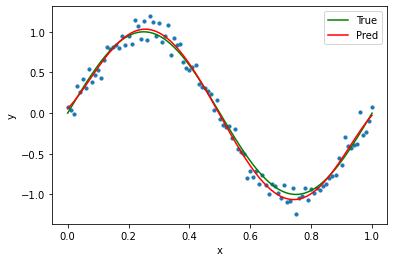

In [205]:
polynomial_features= PolynomialFeatures(degree=5)
xp = polynomial_features.fit_transform(x.reshape(-1,1))
print(xp.shape)
model = sm.OLS(y_ob, xp).fit()
ypred = model.predict(xp) 


fig = plt.figure(2)
plt.plot(x, y_truth, 'g-',label="True")  # 绘制正弦图像
plt.scatter(x,y_ob,s=10)  # 绘制观测样本点
plt.plot(x, ypred, 'r-',label="Pred")#预测曲线
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [206]:

polynomial_features= PolynomialFeatures(degree=5)
X_5 = polynomial_features.fit_transform(shuffle_x.reshape(-1,1))#4阶多项式
print("The dimension of the design matrix:",X_5.shape)  
mse_5 = []



for train_index, test_index in KF.split(shuffle_x):
    model = sm.OLS(shuffle_y_ob[train_index],X_5[train_index, :])
    result = model.fit()
    predict = X_5[test_index, :].dot(result.params.T)
    mse_ = mean_squared_error(shuffle_y_truth[test_index], predict)
    mse_5.append(mse_)

print(mse_5)
print("在5次幂下，经过5折交叉验证，平均均方误差为:%0.4f"%(sum(mse_5)/len(mse_5)))

The dimension of the design matrix: (101, 6)
[0.0013295766288100599, 0.0016497345818805918, 0.0017589789297876208, 0.00134718424837357, 0.0025746915650556148]
在5次幂下，经过5折交叉验证，平均均方误差为:0.0017


样本量为101时，在5次幂下，经过5折交叉验证平均均方误差最小。所以选择5阶多项式

# 接下来我们研究样本量对交叉验证结果的影响。

In [207]:
#函数：求d阶多项式下5折交叉验证的平均均方误差
def CV(x,y_ob,y_truth,d=1):# x为输入，y为观测的输出，y_truth为真值，d为多项式阶数。
    
    polynomial_features= PolynomialFeatures(degree=d)
    X_ = polynomial_features.fit_transform(x.reshape(-1,1))#几阶多项式
    print("The dimension of the design matrix:",X_.shape)  
    mse_all = []



    for train_index, test_index in KF.split(x):
        model = sm.OLS(y_ob[train_index],X_[train_index, :])
        result = model.fit()
        predict = X_[test_index, :].dot(result.params.T)
        mse_ = mean_squared_error(y_truth[test_index], predict)
        mse_all.append(mse_)

    
    print("在",d,"次幂下，经过5折交叉验证，平均均方误差为:%0.4f"%(sum(mse_all)/len(mse_all)))
    return sum(mse_all)/len(mse_all)
    

In [112]:
#  给定样本产生的间隔调整样本量，返回交叉验证结果
def n_effect(step):  #step:Spacing between values. It will affect the number of samples.
    x = np.arange(0, 1.01, step)# 
    f = lambda z: np.sin(2*np.pi*z)
    print("样本量为",x.shape[0])
    y_truth = f(x)

    np.random.seed(247)
    y_ob = f(x) + np.random.normal(0, 0.1, len(x))

# 打乱数组顺序
    shuffle_index = np.arange(len(x))
    random.shuffle(shuffle_index)

    shuffle_x = x[shuffle_index]
    shuffle_y_truth = y_truth[shuffle_index]
    shuffle_y_ob = y_ob[shuffle_index]

    KF = KFold(n_splits=5)  # 用于交叉验证
    error_for_each_d=[]
    for i in range(1,6):
    
    
        error_for_each_d.append(CV(shuffle_x,shuffle_y_ob,shuffle_y_truth,d=i))
    choice_of_d= np.argmin(np.array(error_for_each_d))+1#选择使均方误差最小的阶数
    print("当样本量为",x.shape[0],"时，在",choice_of_d,"次多项式下，5折交叉验证下平均均方误差最小")

In [120]:
n_effect(0.001)

样本量为 1010
The dimension of the design matrix: (1010, 2)
在 1 次幂下，经过5折交叉验证，平均均方误差为:0.2040
The dimension of the design matrix: (1010, 3)
在 2 次幂下，经过5折交叉验证，平均均方误差为:0.2038
The dimension of the design matrix: (1010, 4)
在 3 次幂下，经过5折交叉验证，平均均方误差为:0.0049
The dimension of the design matrix: (1010, 5)
在 4 次幂下，经过5折交叉验证，平均均方误差为:0.0049
The dimension of the design matrix: (1010, 6)
在 5 次幂下，经过5折交叉验证，平均均方误差为:0.0001
当样本量为 1010 时，在 5 次多项式下，5折交叉验证下平均均方误差最小


In [121]:
n_effect(0.01)

样本量为 101
The dimension of the design matrix: (101, 2)
在 1 次幂下，经过5折交叉验证，平均均方误差为:0.2200
The dimension of the design matrix: (101, 3)
在 2 次幂下，经过5折交叉验证，平均均方误差为:0.2207
The dimension of the design matrix: (101, 4)
在 3 次幂下，经过5折交叉验证，平均均方误差为:0.0062
The dimension of the design matrix: (101, 5)
在 4 次幂下，经过5折交叉验证，平均均方误差为:0.0065
The dimension of the design matrix: (101, 6)
在 5 次幂下，经过5折交叉验证，平均均方误差为:0.0016
当样本量为 101 时，在 5 次多项式下，5折交叉验证下平均均方误差最小


In [122]:
n_effect(0.02)

样本量为 51
The dimension of the design matrix: (51, 2)
在 1 次幂下，经过5折交叉验证，平均均方误差为:0.2127
The dimension of the design matrix: (51, 3)
在 2 次幂下，经过5折交叉验证，平均均方误差为:0.2246
The dimension of the design matrix: (51, 4)
在 3 次幂下，经过5折交叉验证，平均均方误差为:0.0070
The dimension of the design matrix: (51, 5)
在 4 次幂下，经过5折交叉验证，平均均方误差为:0.0091
The dimension of the design matrix: (51, 6)
在 5 次幂下，经过5折交叉验证，平均均方误差为:0.0013
当样本量为 51 时，在 5 次多项式下，5折交叉验证下平均均方误差最小


In [123]:
n_effect(0.05)

样本量为 21
The dimension of the design matrix: (21, 2)
在 1 次幂下，经过5折交叉验证，平均均方误差为:0.3340
The dimension of the design matrix: (21, 3)
在 2 次幂下，经过5折交叉验证，平均均方误差为:0.3519
The dimension of the design matrix: (21, 4)
在 3 次幂下，经过5折交叉验证，平均均方误差为:0.0155
The dimension of the design matrix: (21, 5)
在 4 次幂下，经过5折交叉验证，平均均方误差为:0.0181
The dimension of the design matrix: (21, 6)
在 5 次幂下，经过5折交叉验证，平均均方误差为:0.0057
当样本量为 21 时，在 5 次多项式下，5折交叉验证下平均均方误差最小


In [124]:
n_effect(0.1)

样本量为 11
The dimension of the design matrix: (11, 2)
在 1 次幂下，经过5折交叉验证，平均均方误差为:0.4346
The dimension of the design matrix: (11, 3)
在 2 次幂下，经过5折交叉验证，平均均方误差为:0.7835
The dimension of the design matrix: (11, 4)
在 3 次幂下，经过5折交叉验证，平均均方误差为:0.0500
The dimension of the design matrix: (11, 5)
在 4 次幂下，经过5折交叉验证，平均均方误差为:0.1077
The dimension of the design matrix: (11, 6)
在 5 次幂下，经过5折交叉验证，平均均方误差为:0.0520
当样本量为 11 时，在 3 次多项式下，5折交叉验证下平均均方误差最小


In [125]:
n_effect(0.2)

样本量为 6
The dimension of the design matrix: (6, 2)
在 1 次幂下，经过5折交叉验证，平均均方误差为:0.7281
The dimension of the design matrix: (6, 3)
在 2 次幂下，经过5折交叉验证，平均均方误差为:3.1074
The dimension of the design matrix: (6, 4)
在 3 次幂下，经过5折交叉验证，平均均方误差为:0.0120
The dimension of the design matrix: (6, 5)
在 4 次幂下，经过5折交叉验证，平均均方误差为:0.1097
The dimension of the design matrix: (6, 6)
在 5 次幂下，经过5折交叉验证，平均均方误差为:0.1774
当样本量为 6 时，在 3 次多项式下，5折交叉验证下平均均方误差最小


我们可以看到当样本量充足时，选择5阶多项式最好。当样本量不足时，更低阶多项式的MSE更小。这是因为此时样本量不足，不能很好的估计高阶多项式。